# RNN Algorithm on Tesla Prediction Dataset

<b> Load Dataset

In [30]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Import the dataset and encode the date
df = pd.read_csv(r"C:\Users\santhosh\Downloads\Tesla_Nasdaq_Prediction.csv")
df

,Date,Close/Last,Volume,Open,High,Low
0,4/8/2022,1025.49,18337900,1043.21,1048.44,1022.44
1,4/7/2022,1057.26,26482350,1052.39,1076.59,1021.54
2,4/6/2022,1045.76,29782850,1073.47,1079.00,1027.70
3,4/5/2022,1091.26,26691670,1136.30,1152.87,1087.30
4,4/4/2022,1145.45,27392570,1089.38,1149.91,1072.53
...,...,...,...,...,...,...
2512,4/17/2012,6.45,5574815,6.49,6.61,6.41
2513,4/16/2012,6.45,5486020,6.68,6.74,6.42
2514,4/13/2012,6.72,3247900,6.79,6.81,6.57
2515,4/12/2012,6.69,5169020,6.75,6.90,6.58


In [14]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,4/8/2022,1025.49,18337900,1043.21,1048.44,1022.44
1,4/7/2022,1057.26,26482350,1052.39,1076.59,1021.54
2,4/6/2022,1045.76,29782850,1073.47,1079.00,1027.70
3,4/5/2022,1091.26,26691670,1136.30,1152.87,1087.30
4,4/4/2022,1145.45,27392570,1089.38,1149.91,1072.53


In [16]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2512,4/17/2012,6.45,5574815,6.49,6.61,6.41
2513,4/16/2012,6.45,5486020,6.68,6.74,6.42
2514,4/13/2012,6.72,3247900,6.79,6.81,6.57
2515,4/12/2012,6.69,5169020,6.75,6.90,6.58
2516,4/11/2012,6.62,5526735,6.65,6.66,6.40


In [18]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   int64  
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


<b> Data Clean

In [23]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [25]:
df.duplicated().sum()

0

<b> Exploratory Data Analysis

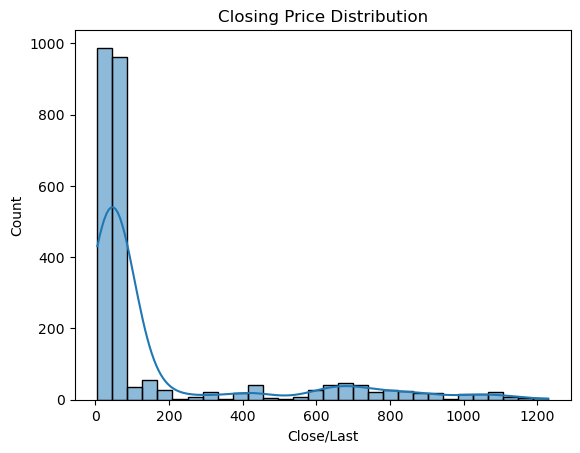

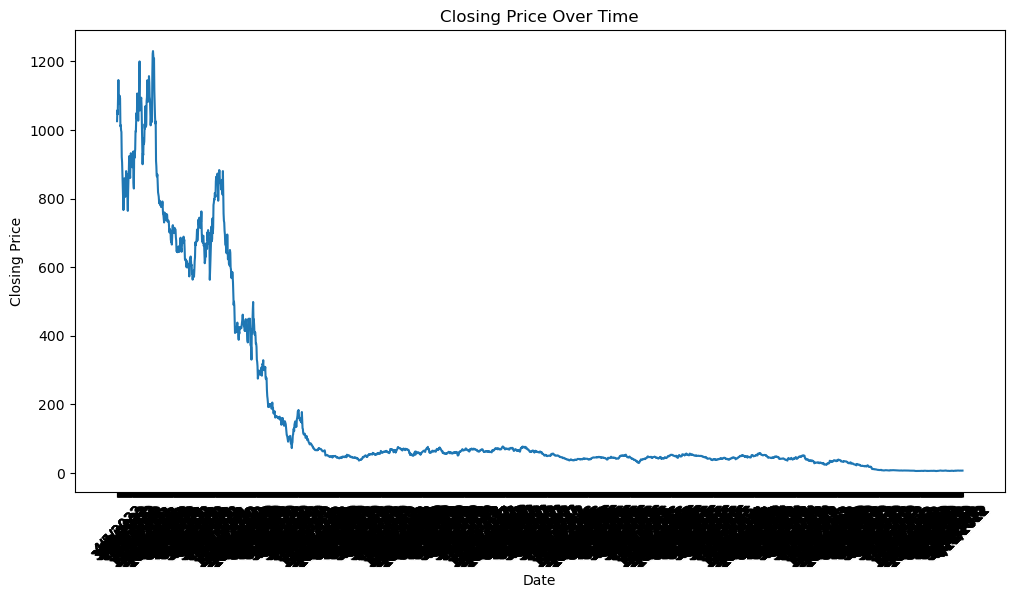

In [31]:
# Distribution of the closing price
sns.histplot(df['Close/Last'], bins=30, kde=True)
plt.title('Closing Price Distribution')
plt.show()

# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()


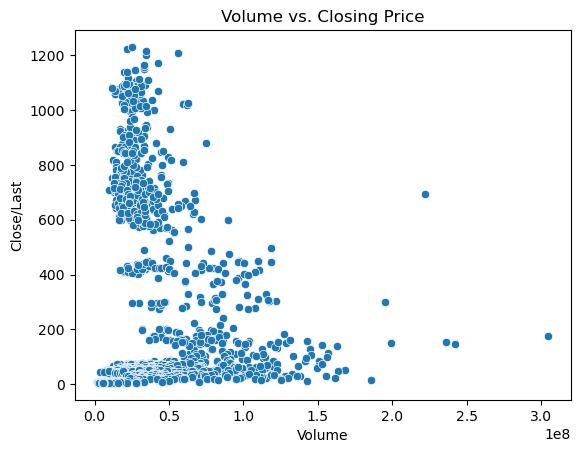

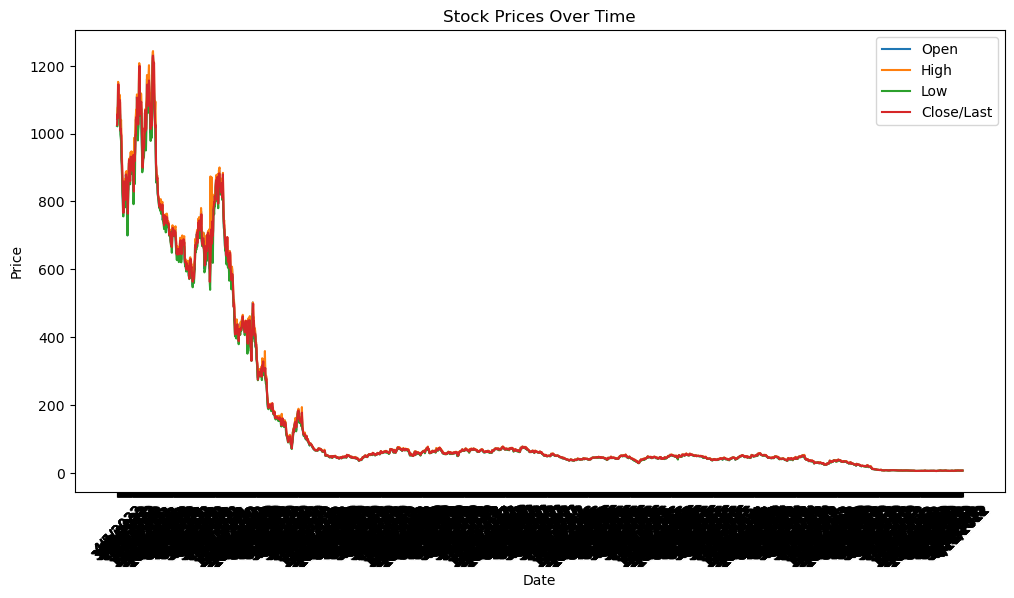

In [34]:
# Scatter plot between closing price and volume
sns.scatterplot(x='Volume', y='Close/Last', data=df)
plt.title('Volume vs. Closing Price')
plt.show()

# Line plot of Open, High, Low, and Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close/Last'], label='Close/Last')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


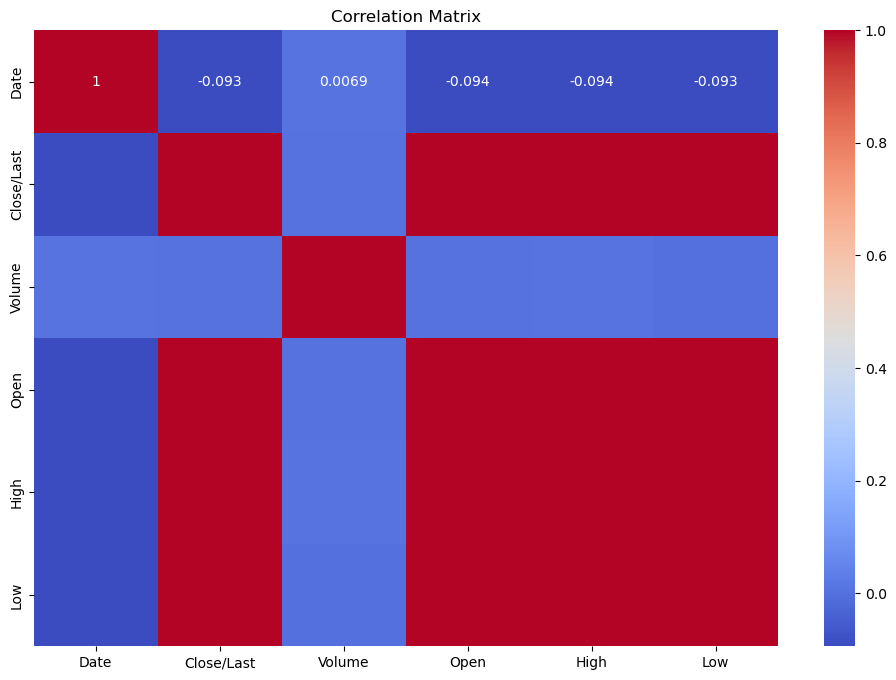

In [38]:
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


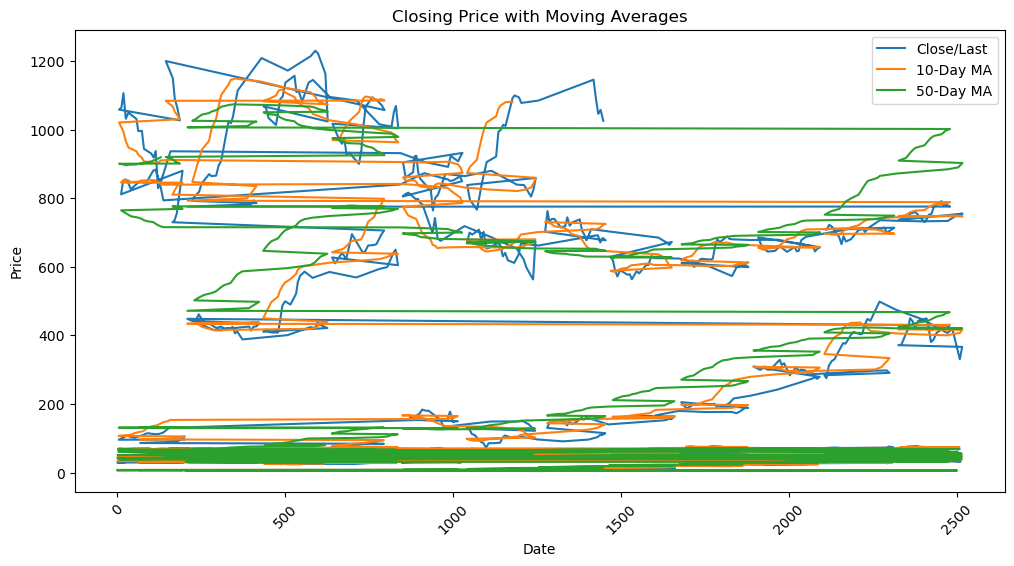

In [40]:
# Compute moving averages
df['MA10'] = df['Close/Last'].rolling(window=10).mean()
df['MA50'] = df['Close/Last'].rolling(window=50).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'], label='Close/Last')
plt.plot(df['Date'], df['MA10'], label='10-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.title('Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


<b> Preprocessing Techniques

In [9]:
group = df.groupby('Date')
Real_Price = group['Open'].mean()
Real_Price

Date
1/10/2013      6.77
1/10/2014     29.69
1/10/2017     46.40
1/10/2018     66.44
1/10/2019     66.88
              ...  
9/9/2015      50.41
9/9/2016      39.82
9/9/2019      46.00
9/9/2020     356.60
9/9/2021     753.41
Name: Open, Length: 2517, dtype: float64

In [10]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]
df_train

Date
1/10/2013      6.77
1/10/2014     29.69
1/10/2017     46.40
1/10/2018     66.44
1/10/2019     66.88
              ...  
9/4/2014      56.80
9/4/2015      48.18
9/4/2018      59.39
9/4/2019      45.38
9/4/2020     402.81
Name: Open, Length: 2487, dtype: float64

In [11]:
df_test

Date
9/5/2012      5.60
9/5/2013     34.02
9/5/2014     56.51
9/5/2017     70.76
9/5/2018     57.01
9/5/2019     44.50
9/6/2012      5.60
9/6/2013     33.71
9/6/2016     39.80
9/6/2017     69.90
9/6/2018     56.96
9/6/2019     45.44
9/7/2012      5.71
9/7/2016     41.10
9/7/2017     69.20
9/7/2018     52.02
9/7/2021    740.00
9/8/2014     55.52
9/8/2015     49.01
9/8/2016     39.91
9/8/2017     69.80
9/8/2020    356.00
9/8/2021    761.58
9/9/2013     32.62
9/9/2014     56.60
9/9/2015     50.41
9/9/2016     39.82
9/9/2019     46.00
9/9/2020    356.60
9/9/2021    753.41
Name: Open, dtype: float64

<b> Train-Test Split

In [12]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

<b> Model Building

In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


C:\Users\santhosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0545
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0497
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0471
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0506
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0449
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0460
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0500
Epoch 8/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0466
Epoch 9/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0475
Epoch 10/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0462
Epoch 11/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0505
Epoch 12/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0465
Epoch 13/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0491
Epoch 14/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0424
Epoch 15/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

<b> Model Prediction

In [14]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


<b> Predicted Values

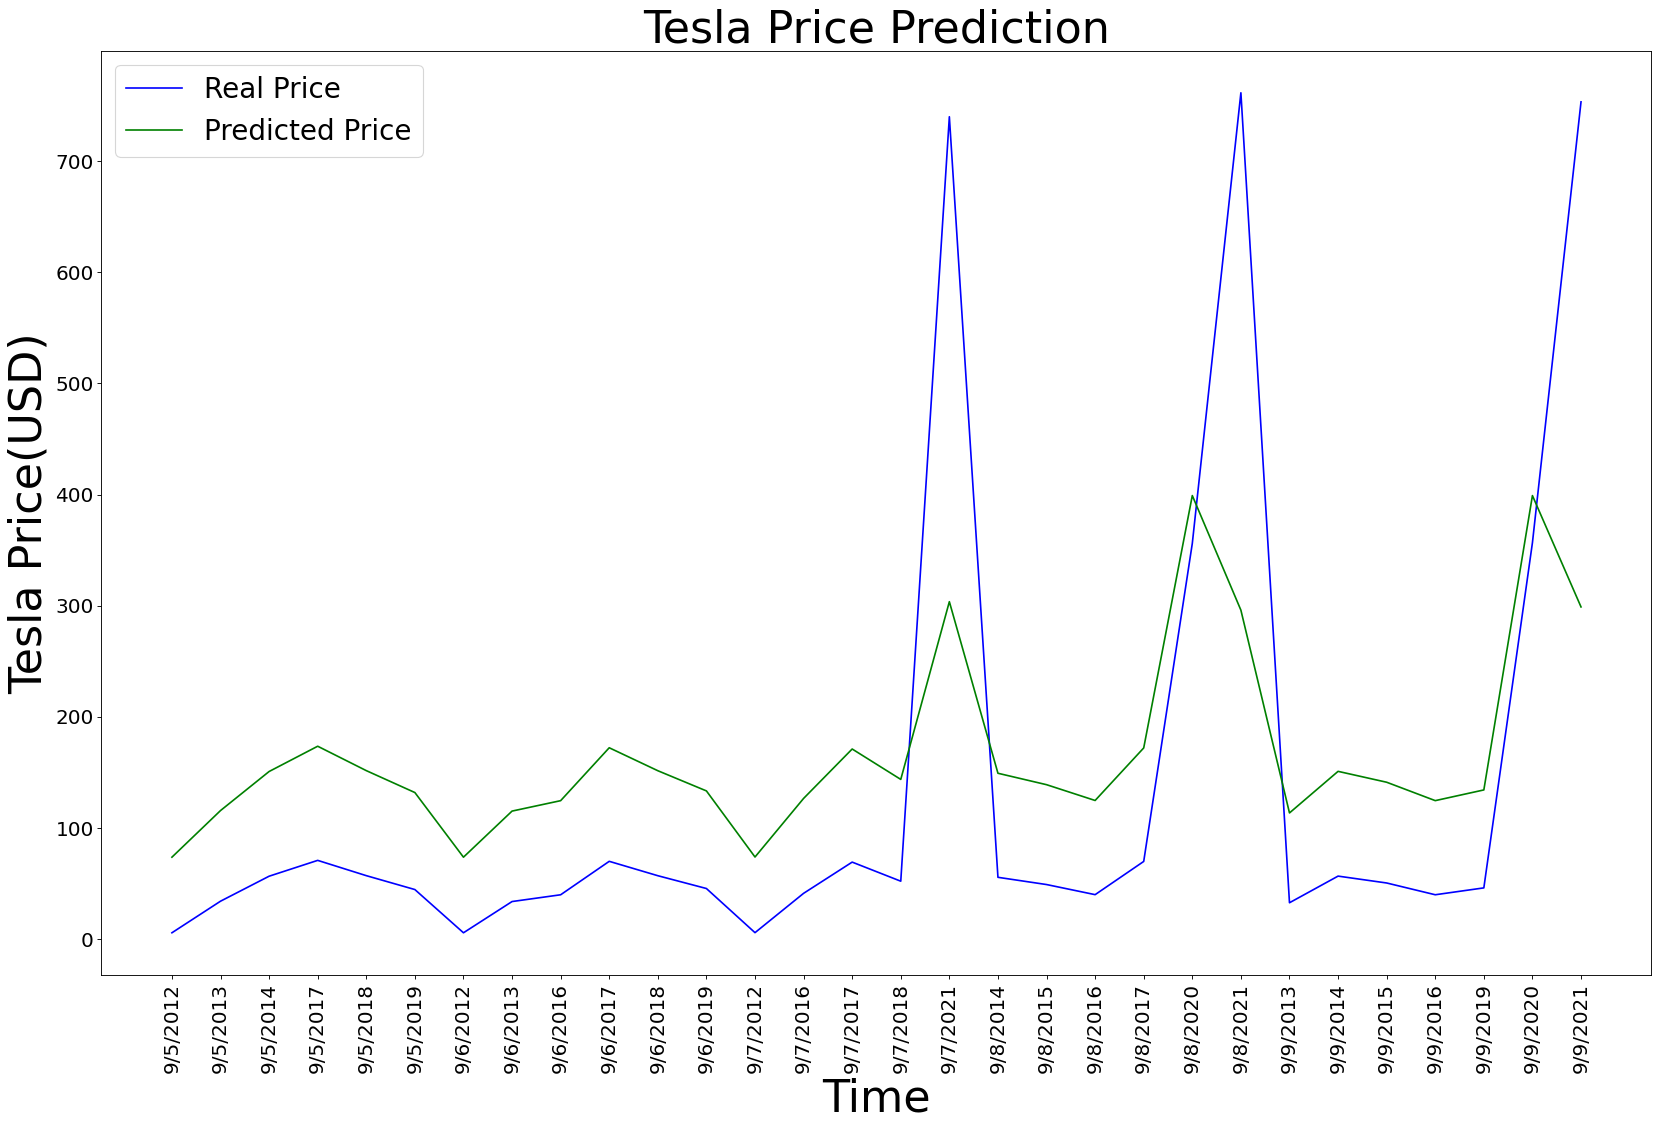

In [17]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'blue', label = 'Real Price')
plt.plot(predicted_BTC_price, color = 'green', label = 'Predicted Price')
plt.title('Tesla Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Tesla Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()